<a href="https://colab.research.google.com/github/Tomxx7/Computer-Vision/blob/main/Histogram%20Equalizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileUpload(value={}, accept='image/*', description='Upload')

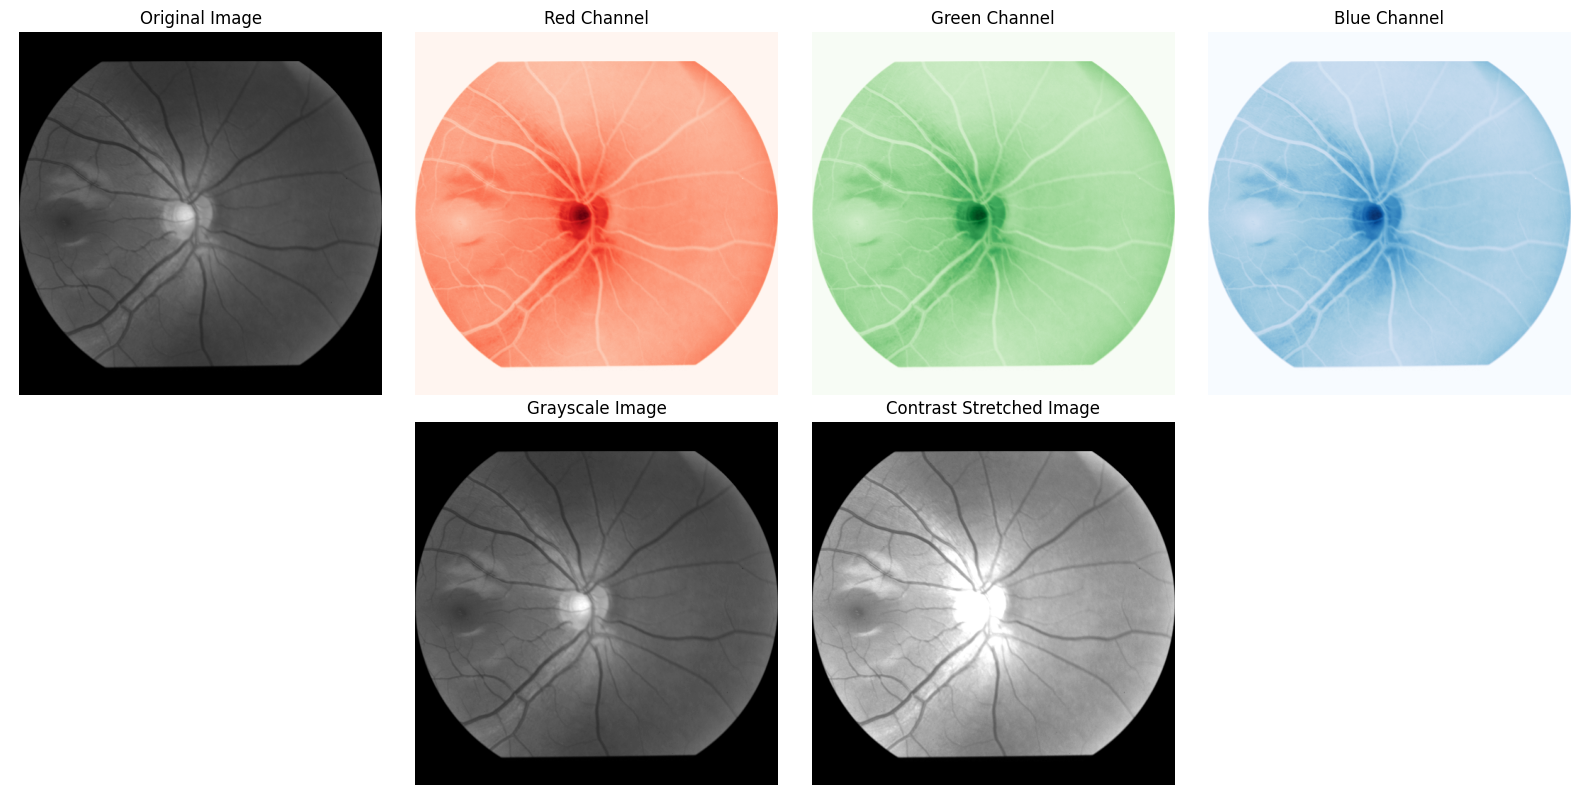

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
from ipywidgets import FileUpload
from IPython.display import display
import io

# Function to perform contrast stretching
def contrast_stretching(img):
    # Convert to numpy array for manipulation
    img_array = np.asarray(img)
    # Stretch contrast
    p2, p98 = np.percentile(img_array, (2, 98))
    img_rescale = exposure.rescale_intensity(img_array, in_range=(p2, p98))
    return Image.fromarray(img_rescale.astype('uint8'))

# Create a file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Function to process the uploaded image
def process_image(change):
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert to grayscale
    gray_image = image.convert('L')

    # Split the image into R, G, B channels
    r, g, b = image.split()

    # Apply contrast stretching
    contrast_image = contrast_stretching(image)

    # Plotting the images
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))

    # Original Image and its channels
    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(r, cmap='Reds')
    axs[0, 1].set_title('Red Channel')
    axs[0, 1].axis('off')

    axs[0, 2].imshow(g, cmap='Greens')
    axs[0, 2].set_title('Green Channel')
    axs[0, 2].axis('off')

    axs[0, 3].imshow(b, cmap='Blues')
    axs[0, 3].set_title('Blue Channel')
    axs[0, 3].axis('off')

    # Grayscale and Contrast-Stretched Image
    axs[1, 1].imshow(gray_image, cmap='gray')
    axs[1, 1].set_title('Grayscale Image')
    axs[1, 1].axis('off')

    axs[1, 2].imshow(contrast_image)
    axs[1, 2].set_title('Contrast Stretched Image')
    axs[1, 2].axis('off')

    # Hide the unused subplots
    axs[1, 0].axis('off')
    axs[1, 3].axis('off')

    plt.tight_layout()
    plt.show()

# Link the function to the file upload widget
upload.observe(process_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

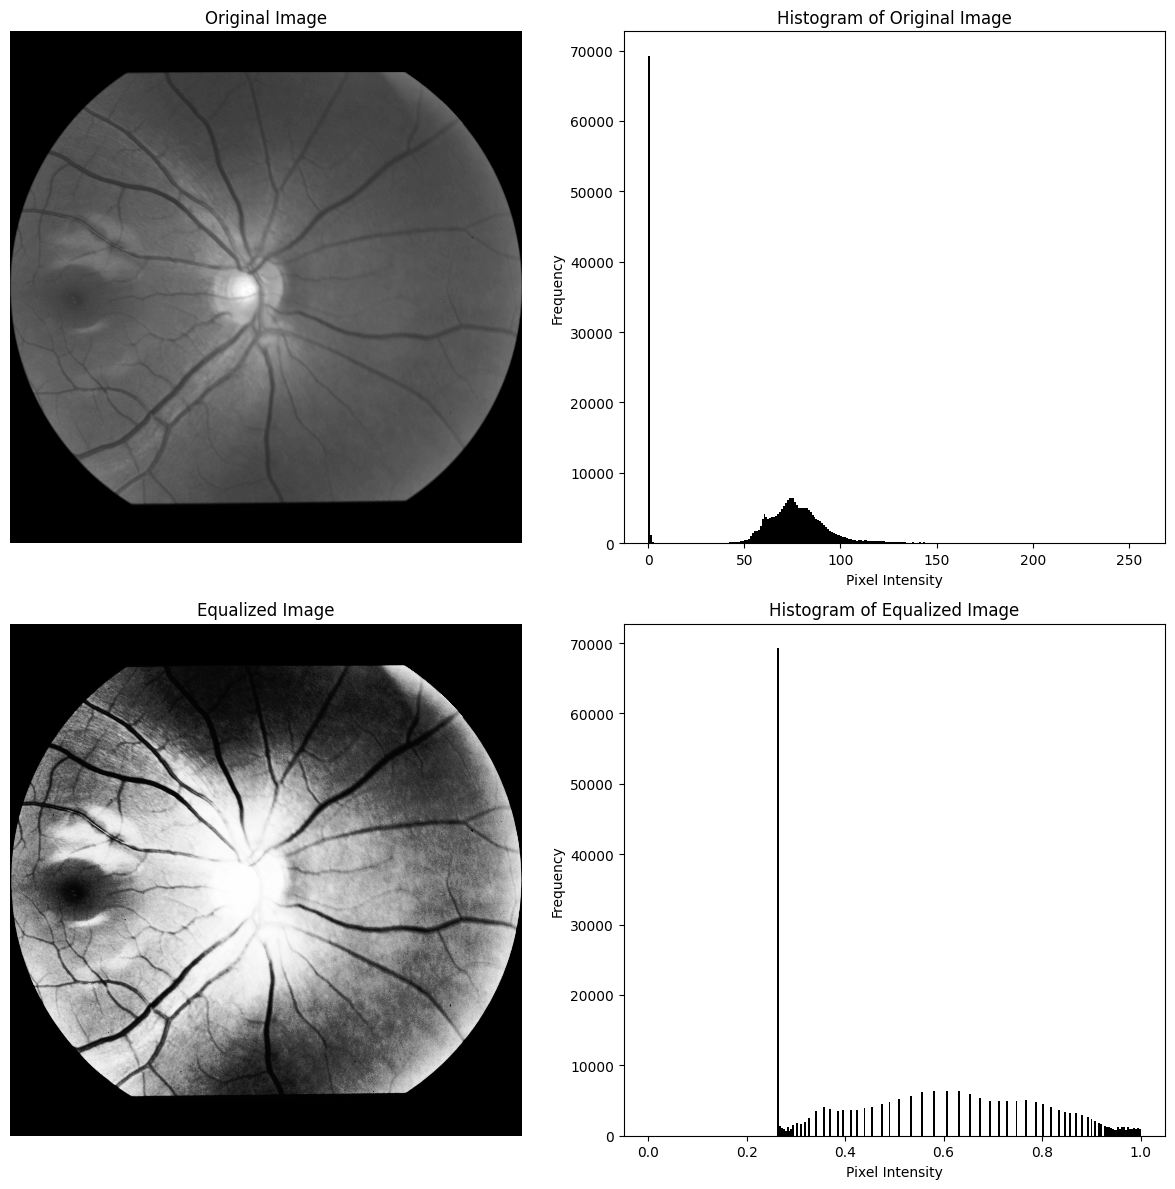

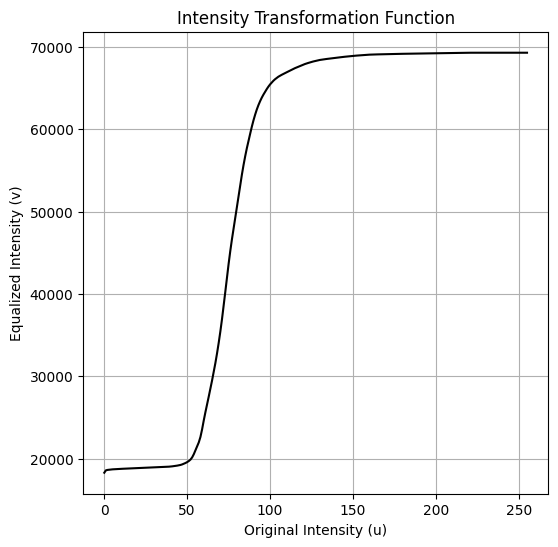

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
from ipywidgets import FileUpload
from IPython.display import display
import io

# Function to process the uploaded image
def process_image(change):
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert to grayscale for histogram equalization
    gray_image = image.convert('L')
    img_array = np.asarray(gray_image)

    # Original Histogram
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # Original Image and its Histogram
    axs[0, 0].imshow(gray_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    axs[0, 1].hist(img_array.flatten(), bins=256, range=[0,256], color='black')
    axs[0, 1].set_title('Histogram of Original Image')
    axs[0, 1].set_xlabel('Pixel Intensity')
    axs[0, 1].set_ylabel('Frequency')

    # Apply Histogram Equalization
    equalized_img_array = exposure.equalize_hist(img_array)
    equalized_img = Image.fromarray((equalized_img_array * 255).astype('uint8'))

    # Calculate the CDF
    hist, bins = np.histogram(img_array.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Equalized Image and its Histogram
    axs[1, 0].imshow(equalized_img, cmap='gray')
    axs[1, 0].set_title('Equalized Image')
    axs[1, 0].axis('off')

    axs[1, 1].hist(equalized_img_array.flatten(), bins=256, range=[0,1], color='black')
    axs[1, 1].set_title('Histogram of Equalized Image')
    axs[1, 1].set_xlabel('Pixel Intensity')
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Plotting the Intensity Transformation Function
    plt.figure(figsize=(6, 6))
    plt.plot(cdf_normalized, color='black')
    plt.title('Intensity Transformation Function')
    plt.xlabel('Original Intensity (u)')
    plt.ylabel('Equalized Intensity (v)')
    plt.grid(True)
    plt.show()

# Create a file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Link the function to the file upload widget
upload.observe(process_image, names='value')


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
import ipywidgets as widgets
from ipywidgets import FileUpload, HBox
from IPython.display import display
import io

# Function to perform contrast stretching
def contrast_stretching(img):
    # Convert to numpy array for manipulation
    img_array = np.asarray(img)
    # Stretch contrast
    p2, p98 = np.percentile(img_array, (2, 98))
    img_rescale = exposure.rescale_intensity(img_array, in_range=(p2, p98))
    return Image.fromarray(img_rescale.astype('uint8'))

# Function to process the uploaded images
def process_images(change):
    # Check if both images are uploaded
    if not upload_original.value or not upload_photoshop.value:
        return

    # Clear previous output
    output.clear_output()

    # Getting the original and Photoshop processed images
    original_file = list(upload_original.value.values())[0]
    photoshop_file = list(upload_photoshop.value.values())[0]

    original_image = Image.open(io.BytesIO(original_file['content']))
    photoshop_image = Image.open(io.BytesIO(photoshop_file['content']))

    # Apply contrast stretching using Python
    python_contrast_image = contrast_stretching(original_image)

    # Displaying the images
    with output:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].imshow(python_contrast_image)
        axs[0].set_title('Python Contrast Stretched Image')
        axs[0].axis('off')

        axs[1].imshow(photoshop_image)
        axs[1].set_title('Photoshop Contrast Stretched Image')
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

# Create file upload widgets
upload_original = FileUpload(accept='image/*', multiple=False, description="Upload Original")
upload_photoshop = FileUpload(accept='image/*', multiple=False, description="Upload Photoshop")

# Create output widget to display images
output = widgets.Output()

# Display widgets
display(HBox([upload_original, upload_photoshop]), output)

# Link the function to the file upload widgets
upload_original.observe(process_images, names='value')
upload_photoshop.observe(process_images, names='value')


Output()

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import ipywidgets as widgets
from ipywidgets import FileUpload, Output, HBox
from IPython.display import display
import io

# Function to perform image inversion
def invert_image(img):
    img_array = np.asarray(img)
    inverted_img = 255 - img_array  # Subtract each pixel from 255 for inversion
    return Image.fromarray(inverted_img)

# Function to process the uploaded image
def process_image(change):
    # Clear previous output
    output.clear_output()

    # Getting the uploaded image
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert image to grayscale
    gray_image = image.convert('L')

    # Apply image inversion
    inverted_image = invert_image(gray_image)

    # Displaying the images
    with output:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].imshow(gray_image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(inverted_image, cmap='gray')
        axs[1].set_title('Inverted Image')
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

# Create a file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Create output widget to display images
output = Output()

# Display widgets
display(HBox([upload, output]))

# Link the function to the file upload widget
upload.observe(process_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import ipywidgets as widgets
from ipywidgets import FileUpload, Output, HBox
from IPython.display import display
import io

# Function to perform power law (gamma) transformation
def power_law_transformation(img, gamma):
    img_array = np.asarray(img, dtype=float)
    normalized_img_array = img_array / 255.0  # Normalize the image array to [0, 1]
    transformed_img_array = np.power(normalized_img_array, gamma)  # Apply gamma correction
    transformed_img_array = (transformed_img_array * 255).astype('uint8')  # Rescale back to [0, 255]
    return Image.fromarray(transformed_img_array)

# Function to process the uploaded image
def process_image(change):
    # Clear previous output
    output.clear_output()

    # Getting the uploaded image
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert image to grayscale
    gray_image = image.convert('L')

    # Apply power law transformations
    transformed_image_04 = power_law_transformation(gray_image, 0.4)
    transformed_image_13 = power_law_transformation(gray_image, 1.3)

    # Displaying the images
    with output:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        axs[0].imshow(gray_image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(transformed_image_04, cmap='gray')
        axs[1].set_title('Power = 0.4')
        axs[1].axis('off')

        axs[2].imshow(transformed_image_13, cmap='gray')
        axs[2].set_title('Power = 1.3')
        axs[2].axis('off')

        plt.tight_layout()
        plt.show()

# Create a file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Create output widget to display images
output = Output()

# Display widgets
display(HBox([upload, output]))

# Link the function to the file upload widget
upload.observe(process_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
from ipywidgets import FileUpload, Output, HBox
from IPython.display import display
import io

# Function to apply power law transformation
def power_law_transformation(img, gamma):
    img_array = np.array(img).astype(np.float32)
    # Normalize the image to range [0, 1]
    normalized_img_array = img_array / 255.0
    # Apply gamma correction
    transformed_img_array = np.power(normalized_img_array, gamma)
    # Rescale to original range [0, 255]
    transformed_img_array = np.uint8(transformed_img_array * 255)
    return Image.fromarray(transformed_img_array)

# Function to handle the uploaded image
def process_image(change):
    # Clear previous output
    output.clear_output()

    # Get the uploaded image
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert the image to grayscale
    gray_image = image.convert('L')

    # Apply power law transformation with gamma values 0.5 and 1.2
    transformed_image_05 = power_law_transformation(gray_image, 0.5)
    transformed_image_12 = power_law_transformation(gray_image, 1.2)

    # Display the images
    with output:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        axs[0].imshow(gray_image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(transformed_image_05, cmap='gray')
        axs[1].set_title('Power = 0.5')
        axs[1].axis('off')

        axs[2].imshow(transformed_image_12, cmap='gray')
        axs[2].set_title('Power = 1.2')
        axs[2].axis('off')

        plt.show()

# Create and display file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Create an output widget to display images
output = Output()
display(HBox([upload, output]))

# Link the function to the file upload widget
upload.observe(process_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import ipywidgets as widgets
from ipywidgets import FileUpload, Output, HBox
from IPython.display import display
import io

# Function to normalize image data to [0, 1]
def normalize_image(image):
    return cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Function to process the uploaded image
def process_image(change):
    # Clear previous output
    output.clear_output()

    # Getting the uploaded image
    uploaded_file = list(upload.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Convert image to OpenCV format
    img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Retinex Decomposition
    luminance, reflectance = retinex_decomposition(img_cv)

    # Enhance Luminance
    enhanced_luminance = enhance_luminance(luminance)

    # Enhance the overall image
    enhanced_image = enhanced_luminance * reflectance
    enhanced_image = normalize_image(enhanced_image)  # Normalize to [0, 1]

    # Displaying the images
    with output:
        fig, axs = plt.subplots(1, 5, figsize=(20, 4))

        axs[0].imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(luminance, cmap='gray')
        axs[1].set_title('Luminance Component')
        axs[1].axis('off')

        axs[2].imshow(reflectance)
        axs[2].set_title('Reflectance Component')
        axs[2].axis('off')

        axs[3].imshow(enhanced_luminance, cmap='gray')
        axs[3].set_title('Enhanced Luminance')
        axs[3].axis('off')

        axs[4].imshow(enhanced_image)
        axs[4].set_title('Enhanced Image')
        axs[4].axis('off')

        plt.show()

# Create a file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Create an output widget to display images
output = Output()
display(HBox([upload, output]))

# Link the function to the file upload widget
upload.observe(process_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')